<a href="https://colab.research.google.com/github/Samrajan2919/SAM/blob/master/Heart_disease(Decisions_Trees).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifiation Tree(used in medical feilds)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import  the data

In [ ]:
df=pd.read_csv('/content/processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


since the columns has no names will name it
age
sex
chestpain
restbp:resting bp in mm Hg
chol:sertum cholesterol in mg/dl
fbs:fasting blood sugar
restecg:resting electrcardiograpphic result
thalach:max heart rate ahcived
exang:excerse induced angina
oldpeak:st depression induced by excerse relative rest
slope: slope of peej excersice st segment
ca:number of majar vessels (0-3) colored by flutoscopy
thal: thalium heart scan
hd:diagnisis of heart dieses to predited


In [ ]:
df.columns=['age',
'sex',
'chestpain',
'restbp',
'chol',
'fbs',
'restecg',
'thalach',
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'hd']

In [ ]:
df .head()

,age,sex,chestpain,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    float64
 2   chestpain  303 non-null    float64
 3   restbp     303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    float64
 6   restecg    303 non-null    float64
 7   thalach    303 non-null    float64
 8   exang      303 non-null    float64
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    float64
 11  ca         303 non-null    object 
 12  thal       303 non-null    object 
 13  hd         303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Dealing with Missing data

In [ ]:
df.isna().sum()

age          0
sex          0
chestpain    0
restbp       0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
hd           0
dtype: int64

Print out the unique value in object columns(mixture of number and letters)

In [ ]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

? missing value

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
#print the number of rows with missing data
len(df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')])

6

since oly six rows so we can look into it

In [ ]:
df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')]


,age,sex,chestpain,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


total rows

In [ ]:
len(df)

303

In [ ]:
data_no_missing=df.loc[(df['ca']!='?')
          &
          (df['thal']!='?')]

In [ ]:
len(data_no_missing)

297

In [ ]:
data_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
data_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

Formatting data set
1). dependent and indepent varible

In [ ]:
X=data_no_missing.drop('hd',axis=1).copy() #data.iloc[:,:-1]
X.head()

,age,sex,chestpain,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y=data_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

One hot encoding

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    float64
 2   chestpain  297 non-null    float64
 3   restbp     297 non-null    float64
 4   chol       297 non-null    float64
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    float64
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    object 
 12  thal       297 non-null    object 
dtypes: float64(11), object(2)
memory usage: 32.5+ KB


most of the data is category but it is float

chest pain has four options:
1: typical angina
2:atypivcal angina
3:non anginals pain
4:asymtomatic

In [ ]:
X['chestpain'].unique()

array([1., 4., 3., 2.])

(two method for one hot encoding
column transformer and get dummies)

In [ ]:
pd.get_dummies(X,columns=['chestpain']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chestpain_1.0,chestpain_2.0,chestpain_3.0,chestpain_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
X_encoded=pd.get_dummies(X,columns=['chestpain',
                                    'restecg',
                                    'slope',
                                    'thal'])

In [ ]:
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,chestpain_1.0,chestpain_2.0,chestpain_3.0,chestpain_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_index=y>0 # value gether than 0 we convert into 1
y[y_not_zero_index]=1
y.unique()

array([0, 1])

Building classification tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test=train_test_split(X_encoded,y,random_state=42)



In [ ]:
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

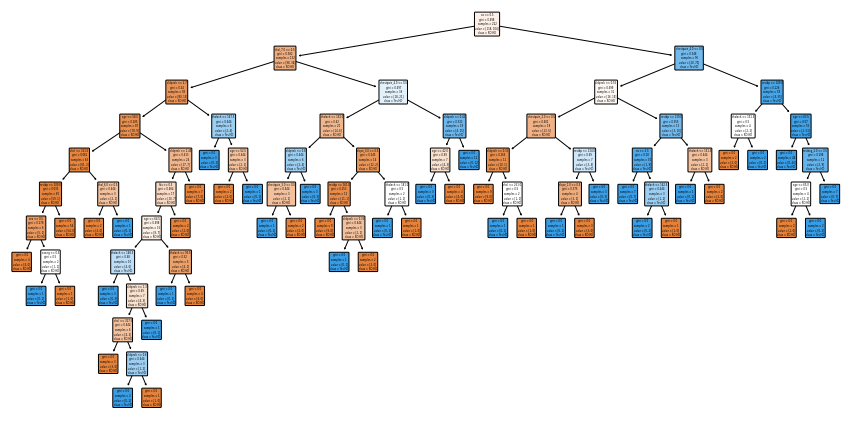

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["NO HD","Yes HD"],
          feature_names=X_encoded.columns);

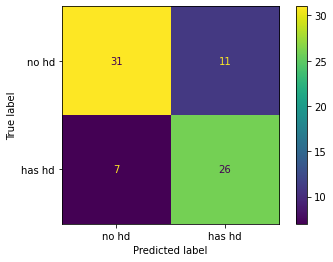

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(clf_dt,X_test, y_test, display_labels=["no hd","has hd"])

cost complexity pruning

In [ ]:
#determiming the alpha
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas # extract differt value of alpha
ccp_alphas=ccp_alphas[:-1] # max value od alpha
 # create an array that will put decison tres into
clf_dts=[]
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)




In [ ]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

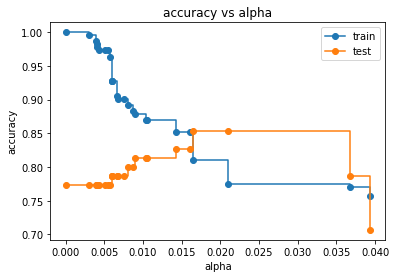

In [ ]:
fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
plt.legend()
plt.show()

cross validation for finding alpha

In [ ]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) # create a tre with ccp alpha =0.016
# now we use 5 fold cross validation create 5 different training and test dataset that are used to train and test
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)



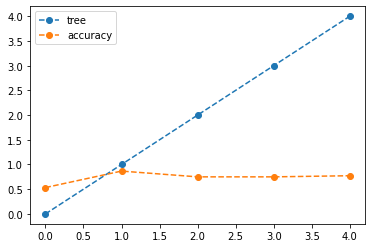

In [ ]:
df=pd.DataFrame(data={"tree": range(5),"accuracy":scores})
df.plot(scalex="tree",scaley="accuracy",marker="o",linestyle="--")

thr graph shows that using traing and tes data with the same  alpha resulted in different acccuracies suggesting that alpha is sensitive to the dataset so intesd a singlr traing andtest dataset lets use cross validation to find  the optomal value 


In [ ]:
alpha_loop_values=[]
# for each candidate value for alpha we will run 5 fold cross validation then we will store the mean and std deviation of the scores the accuracy for each call to cross val scoreis alpha lop value

In [ ]:
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

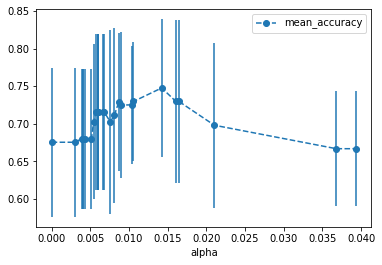

In [ ]:
alpha_results=pd.DataFrame(alpha_loop_values,columns=["alpha","mean_accuracy","std"])
alpha_results.plot(x="alpha",y="mean_accuracy",yerr="std",marker="o",linestyle="--")

In [ ]:
alpha_results[(alpha_results["alpha"]>0.014)
              &
              (alpha_results["alpha"]<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


lets store the ideal value for alpha so thst we use it to build a tree

In [ ]:
ideal_ccp_alpha=alpha_results[(alpha_results["alpha"]>0.014)
                              &
                              (alpha_results["alpha"]<0.015)]["alpha"]


at this point pyhton thinkd thst is series which is tpye of array we can tell because when we printed ideal ccp alpha out we got of stuff the first one is 20 which is the index in the eries the second one 0.01422 is the value we went so we can covert it to float

In [ ]:
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [ ]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

we can find alpha using grid search also

Building final classification tree

In [ ]:
# build and train a new decision tree only this time we use optimal value for alpha

In [ ]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)

In [ ]:
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

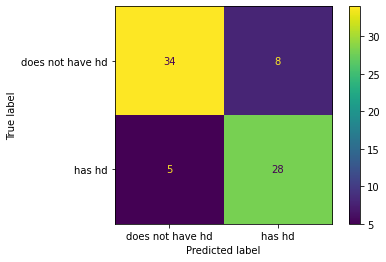

In [ ]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=['does not have hd','has hd'])

pruned tree better than before

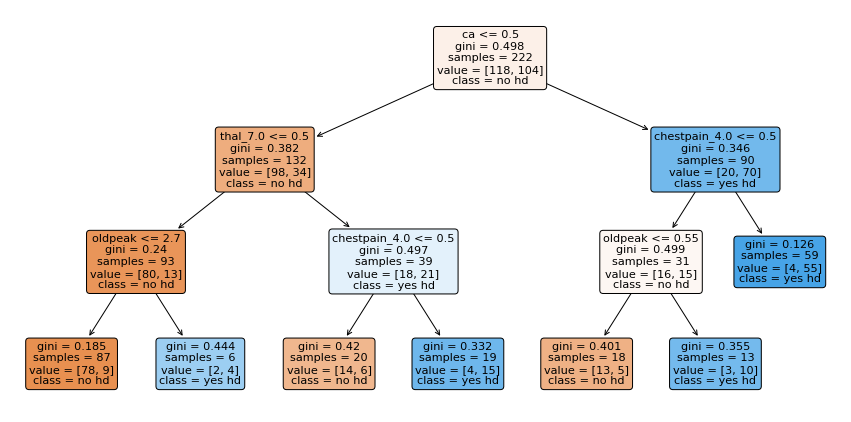

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["no hd","yes hd"],feature_names=X_encoded.columns);

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = no hd'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = no hd'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = no hd'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = no hd'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = yes hd'),
 Text(386.3076923076923, 152.8875, 'chestpain_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = yes hd'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = no hd'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = yes hd'),
 Text(708.2307692307693, 254.8125, 'chestpain_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\

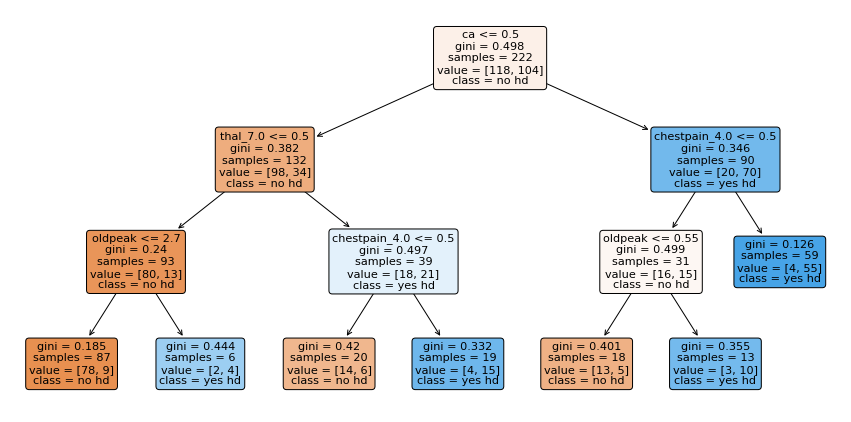

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["no hd","yes hd"],feature_names=X_encoded.columns)

lets dicuss how to interpret the treee
.) the vrible (columnsnames) and the threshold for splitting the observation for example in the tree's root we use ca to split the observation all observation with ca<=0.5 go to the left and all observation with ca>0.5 go to right
.)gini is the index or score  for that node
.) samples tell as how many samples are in the node
,.)value telss us how many samoples in thr nodes are  din each category  in the example we have  two catehoirs No and YES refferoing to whether or not paitent haas heart disease  number NO cmes fisrt beacuse of alphabetic order 
.) class tells us whetherv  category is repremted most in the node in the root ,in thr root since 118 poppele hae no and only 104 has YES so CLASs set to NO
